# **Loan Default Prediction**

### Executive Summary: Loan Default Prediction Analysis

**Objective:**
The project's primary goal is to enhance the decision-making process for approving home equity lines of credit in a retail bank setting. By leveraging advanced machine learning techniques, the focus is on developing a predictive model that not only improves efficiency and accuracy but also contributes to reducing the risk of loan defaults, which significantly impact the bank's profitability.

**Data Analysis and Preprocessing:**
Analysis of the Home Equity dataset (HMEQ) involved a thorough examination of its structure, with a focus on data types, missing values, and duplicate values. Key preprocessing steps included:

- Handling missing values.
- Identifying important features such as debt-to-income ratio, age of the oldest credit line, and number of existing credit lines.

**Model Building and Evaluation:**
The process included data preparation, partitioning into training and testing sets, and the application of machine learning models for prediction.

**Proposed Model Specifications:**
- **Model Type:** The Random Forest classifier, both untuned and tuned versions, was identified as the most suitable model.
- **Key Features:**
   - **Debt-to-Income Ratio:** Identified as a critical feature, indicating that individuals with a debt payment higher than their monthly income are likely to default.
   - **Oldest Credit Line Age:** Serves as a reliable indicator of loan default likelihood.
   - **Number of Credit Lines:** A higher number of credit lines is correlated with a higher probability of at least one default.
- **Performance Metrics:**
   - **Precision:** High precision (0.912) ensures that the model accurately identifies true positive cases.
   - **Recall:** Strong recall (0.827) indicates effectiveness in minimizing false negatives.
   - **Accuracy:** An accuracy of 0.908, suggesting reliable overall performance.
- **Advantages of Random Forest:**
   - The ensemble method provides a balanced approach, outperforming the Decision Tree model in precision, recall, and accuracy.
   - Despite being computationally more demanding, it offers robust predictions and a better handling of complex patterns in the data.

**Key Next Steps:**
1. **Refine the Random Forest Model:** Focus on tuning and optimizing the model for better performance and efficiency.
2. **Ensure Fairness and Bias Reduction:** Continuously monitor and adjust the model to prevent any biases and ensure fair loan decisions.
3. **Integrate with Loan Processing Workflow:** Seamlessly implement the model in the existing loan approval system.
4. **Regular Performance Review:** Establish a protocol for ongoing evaluation and updating of the model to adapt to new data and market trends.
5. **Cost-Benefit Analysis:** Conduct a thorough assessment to balance the computational costs with the efficiency gains from using the Random Forest model.



### Problem and Solution Summary

**Problem Summary:**
The primary challenge faced by retail banks is managing the risk associated with home loan defaults. These defaults can significantly impact a bank's profits, as a large portion of their revenue comes from interests on home loans extended to regular income or high-earning customers. The traditional loan approval process is effort-intensive, and prone to human error and biases, leading to either unjustified rejections or approval of bad loans (Non-Performing Assets or NPAs). This situation needs a more efficient, unbiased, and accurate system for evaluating loan applications.


**Solution Design Key Points:**
1. **Adopting the Random Forest Classifier:**
   - The model is selected for its high precision (0.912) and recall (0.827), indicating a well-balanced capability in accurately identifying true positives and minimizing false negatives.
   - An accuracy rate of 0.908 ensures the model's overall reliable performance.
   - The ensemble nature of the Random Forest model makes it superior in handling complex patterns compared to a single Decision Tree.

2. **Focusing on Critical Features:**
   - **Debt-to-Income Ratio:** A crucial indicator, suggesting that individuals with higher debt than income are more likely to default.
   - **Oldest Credit Line Age:** An important predictor of the likelihood of loan defaults.
   - **Number of Credit Lines:** A high number of credit lines is associated with an increased risk of default.

3. **Continuous Monitoring and Updating:**
   - Regularly update and tune the model to maintain its accuracy and adapt to changing market conditions.

**Reason for the Proposed Solution Design:**
The Random Forest Classifier is selected for its proven ability to accurately predict loan defaults, critical for reducing NPAs. Its high precision and recall ensure reliable loan approval decisions, minimizing financial risks. The model's focus on key indicators like debt-to-income ratio, credit line age, and the number of credit lines allows a deeper understanding of applicants' financial health, leading to more informed lending decisions. This approach meets the need for an efficient, unbiased, and accurate loan approval process, enhancing risk management while maintaining customer trust.

Insights and recommendation for implementation will be found at the end of the notebook.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [162]:
# Import necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import seaborn as sns

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score, f1_score

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [163]:
data = pd.read_csv('hmeq.csv')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [164]:
data.shape

(5960, 13)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [166]:
data.duplicated().sum()

0

In [167]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

BAD         0.00
LOAN        0.00
MORTDUE     8.69
VALUE       1.88
REASON      4.23
JOB         4.68
YOJ         8.64
DEROG      11.88
DELINQ      9.73
CLAGE       5.17
NINQ        8.56
CLNO        3.72
DEBTINC    21.26
dtype: float64

In [168]:
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

**Observations:** We can see the dataset has a total of 5960 rows and 13 columns, most of the columns are stored as floats, we can observe missing values which will be treated in later steps of this analysis. 

In [169]:
df = data.copy()
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [170]:
num_cols = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
cat_cols = ['REASON', 'JOB', 'BAD']

In [171]:
for col in cat_cols:
    print(df[col].value_counts(1)*100)
    print("-" * 50)

REASON
DebtCon    68.815697
HomeImp    31.184303
Name: proportion, dtype: float64
--------------------------------------------------
JOB
Other      42.034853
ProfExe    22.460834
Office     16.687203
Mgr        13.501144
Self        3.397289
Sales       1.918676
Name: proportion, dtype: float64
--------------------------------------------------
BAD
0    80.050336
1    19.949664
Name: proportion, dtype: float64
--------------------------------------------------


**Observations:** More than 68% of these people requested the loan for Debt Consolidation purposes, the most common job category is "Other", 80% of them paid their loans, this inbalance means that the model will have an incentive to predict 0's, we will factor in that inbalance in the model building. 

## Summary Statistics

In [172]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


**Observations from Summary Statistics:** 
- The mean value of the loans approved is 18,607 the smallest was 1,100 and the biggest loan approved was 89,900.
- The mean amount due to their mortgage is 73,760 
- The mean value of the property was 101,776 the most expensive property is 855,909
- The mean years at their current job is 9 years, the most someone has been in their current job has been 41 years with his current company 
- Most people have 0 major derogatory reports and delinquent credit lines

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [173]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = df, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = df, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = df, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

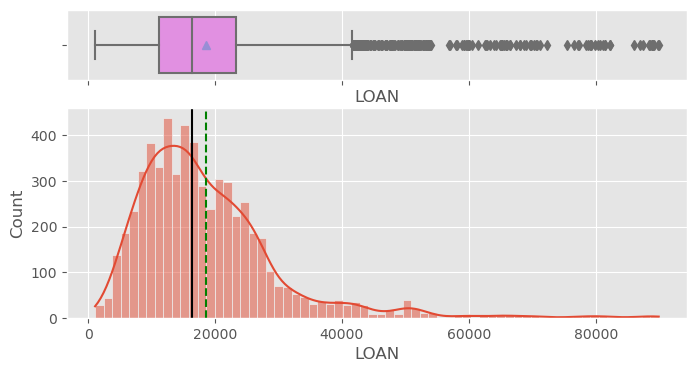

In [174]:
histogram_boxplot(df, 'LOAN', figsize= (8,4), kde=True, bins=None)

In [175]:
df['LOAN'].max() - df['LOAN'].min()

88800

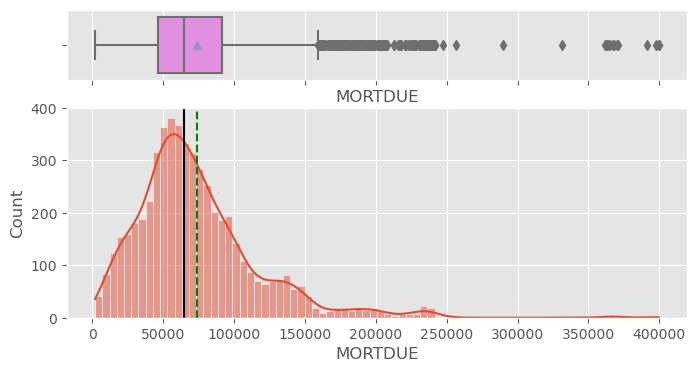

In [176]:
histogram_boxplot(df, 'MORTDUE', figsize= (8,4), kde=True, bins=None)

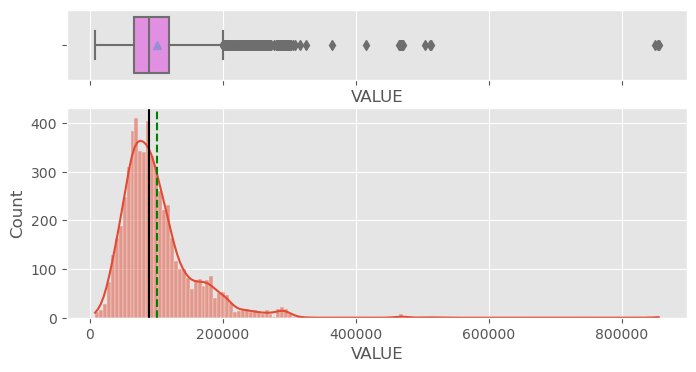

In [177]:
histogram_boxplot(df, 'VALUE', figsize= (8,4), kde=True, bins=None)

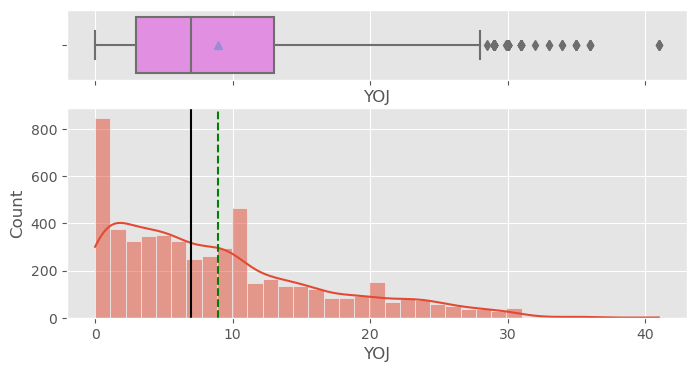

In [178]:
histogram_boxplot(df, 'YOJ', figsize= (8,4), kde=True, bins=None)

**Observations:** There is a big group of people that is on their first year of their careers, the distribution is right skewed with the mean being around 9.

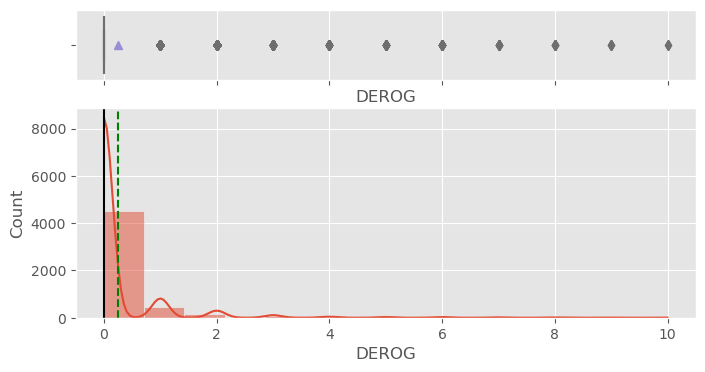

In [179]:
histogram_boxplot(df, 'DEROG', figsize= (8,4), kde=True, bins=None)

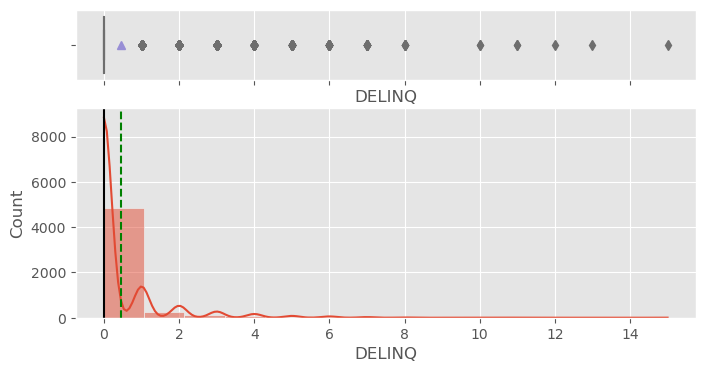

In [180]:
histogram_boxplot(df, 'DELINQ', figsize= (8,4), kde=True, bins=None)

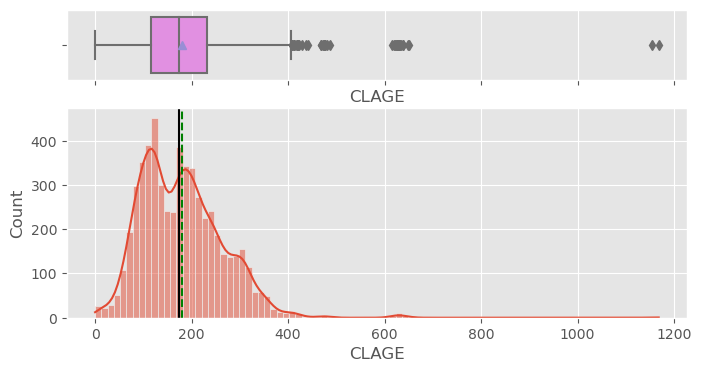

In [181]:
histogram_boxplot(df, 'CLAGE', figsize= (8,4), kde=True, bins=None)

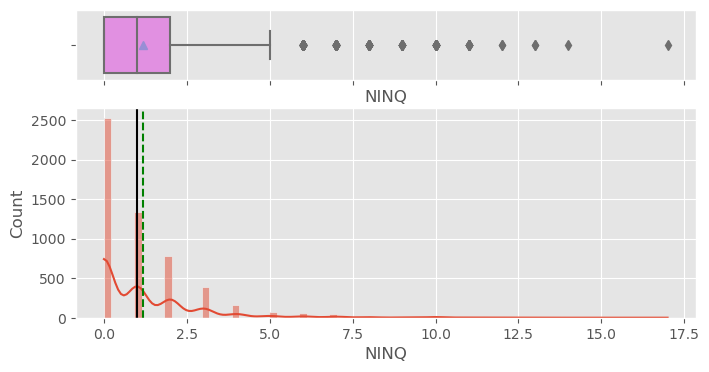

In [182]:
histogram_boxplot(df, 'NINQ', figsize= (8,4), kde=True, bins=None)

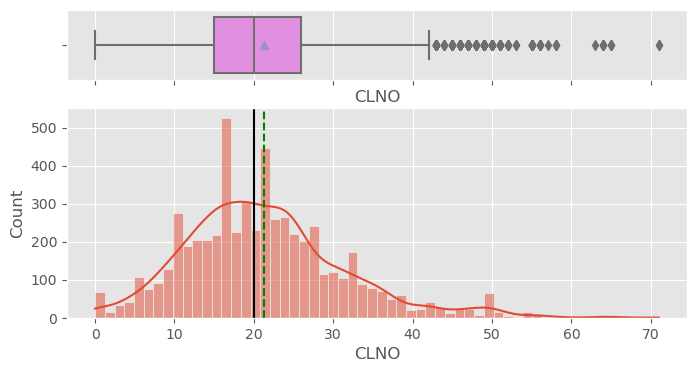

In [183]:
histogram_boxplot(df, 'CLNO', figsize= (8,4), kde=True, bins=None)

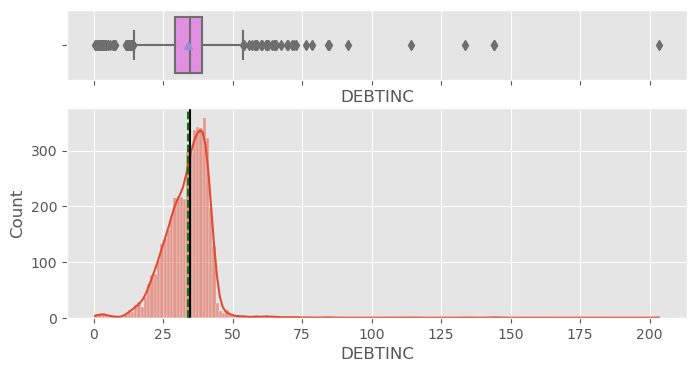

In [184]:
histogram_boxplot(df, 'DEBTINC', figsize= (8,4), kde=True, bins=None)

### **Bivariate Analysis**

In [185]:
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize = "index").sort_values(
        by = sorter, ascending = True
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780
------------------------------------------------------------------------------------------------------------------------


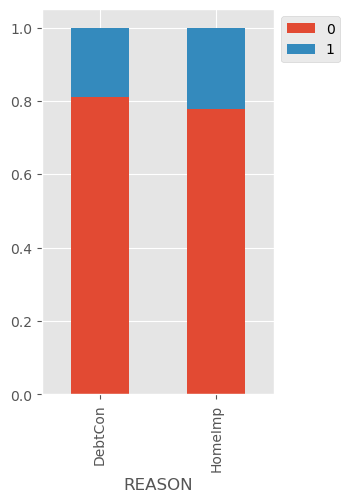

In [186]:
stacked_barplot(df, 'REASON', 'BAD')

BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


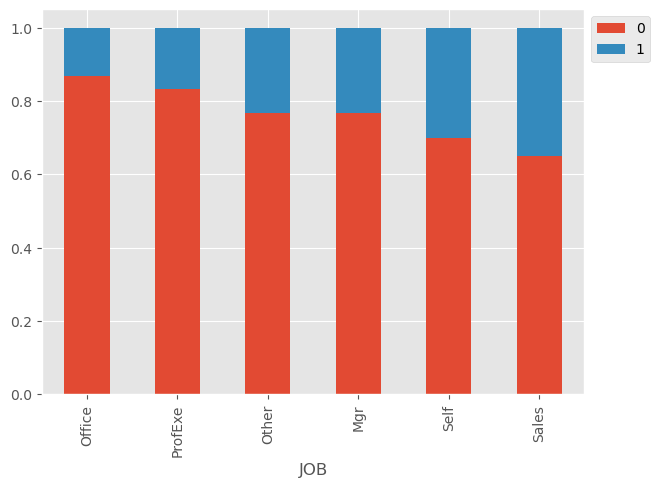

In [187]:
stacked_barplot(df, 'JOB', 'BAD')

In [188]:
corr = df[num_cols].corr()

<Axes: >

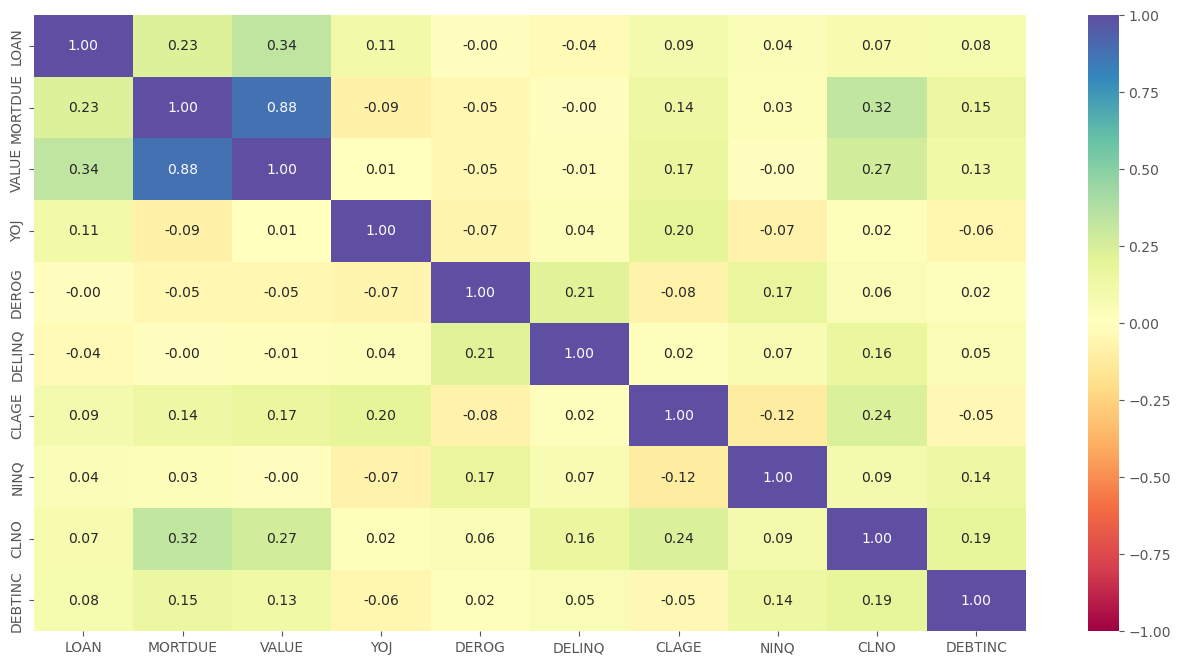

In [189]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (16,8))
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observations:** The only meaningful correlation we see is between the amount due on the existing mortgage and the value of the property, this may seem obvious as the higher a property costs the higher the mortgage you have to get, but leaves the question that theres not much people that have paid most of their mortgage or leaves the impression that most of this mortgages are not too old. 

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

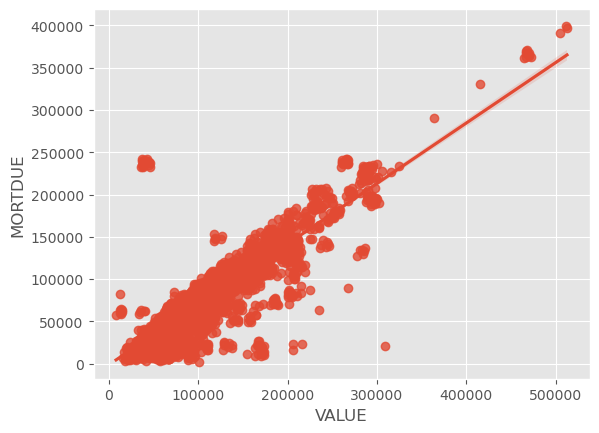

In [190]:
sns.regplot(df, x = 'VALUE', y = 'MORTDUE')

## Treating Outliers

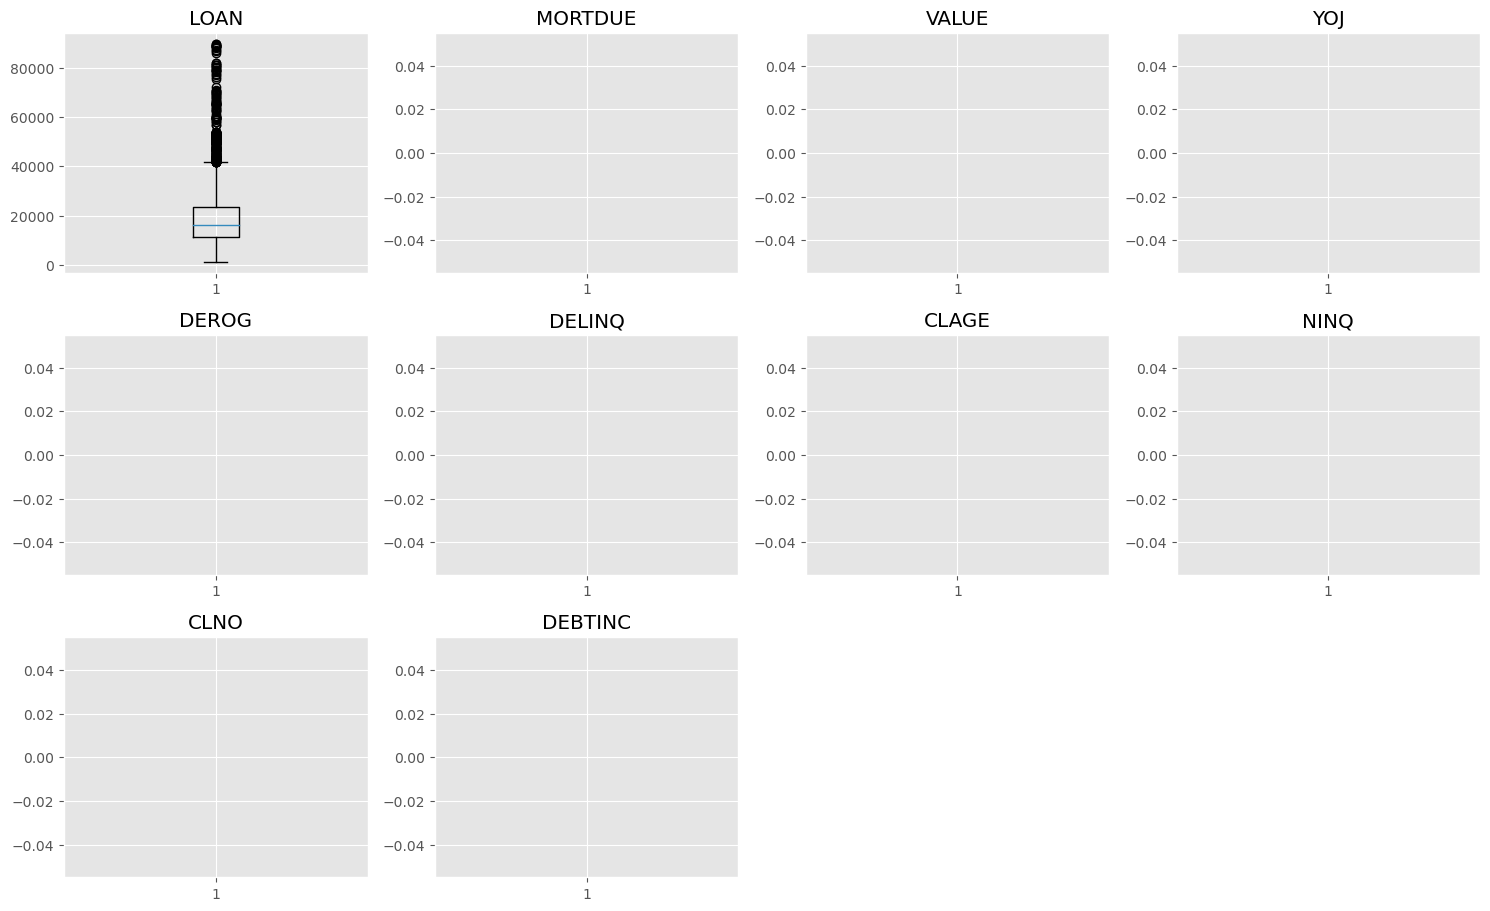

In [191]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [192]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [193]:
# Percentage of outliers in each column
((df[num_cols] < lower_whisker) | (df[num_cols] > upper_whisker)).sum()/df.shape[0]*100

LOAN        4.295302
MORTDUE     3.926174
VALUE       5.369128
YOJ         1.526846
DEROG      12.164430
DELINQ     20.151007
CLAGE       0.788591
NINQ        2.969799
CLNO        3.674497
DEBTINC     1.577181
dtype: float64

In [194]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

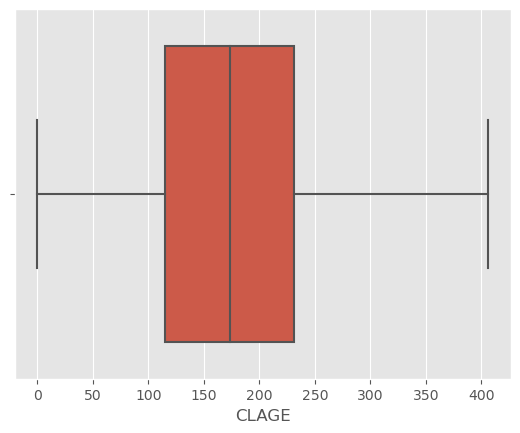

In [195]:
df = treat_outliers(df,'CLAGE')

sns.boxplot(data=df, x = 'CLAGE')
plt.show()

In [196]:
df = treat_outliers(df,'NINQ')
df = treat_outliers(df,'CLNO')
df = treat_outliers(df,'DEBTINC')

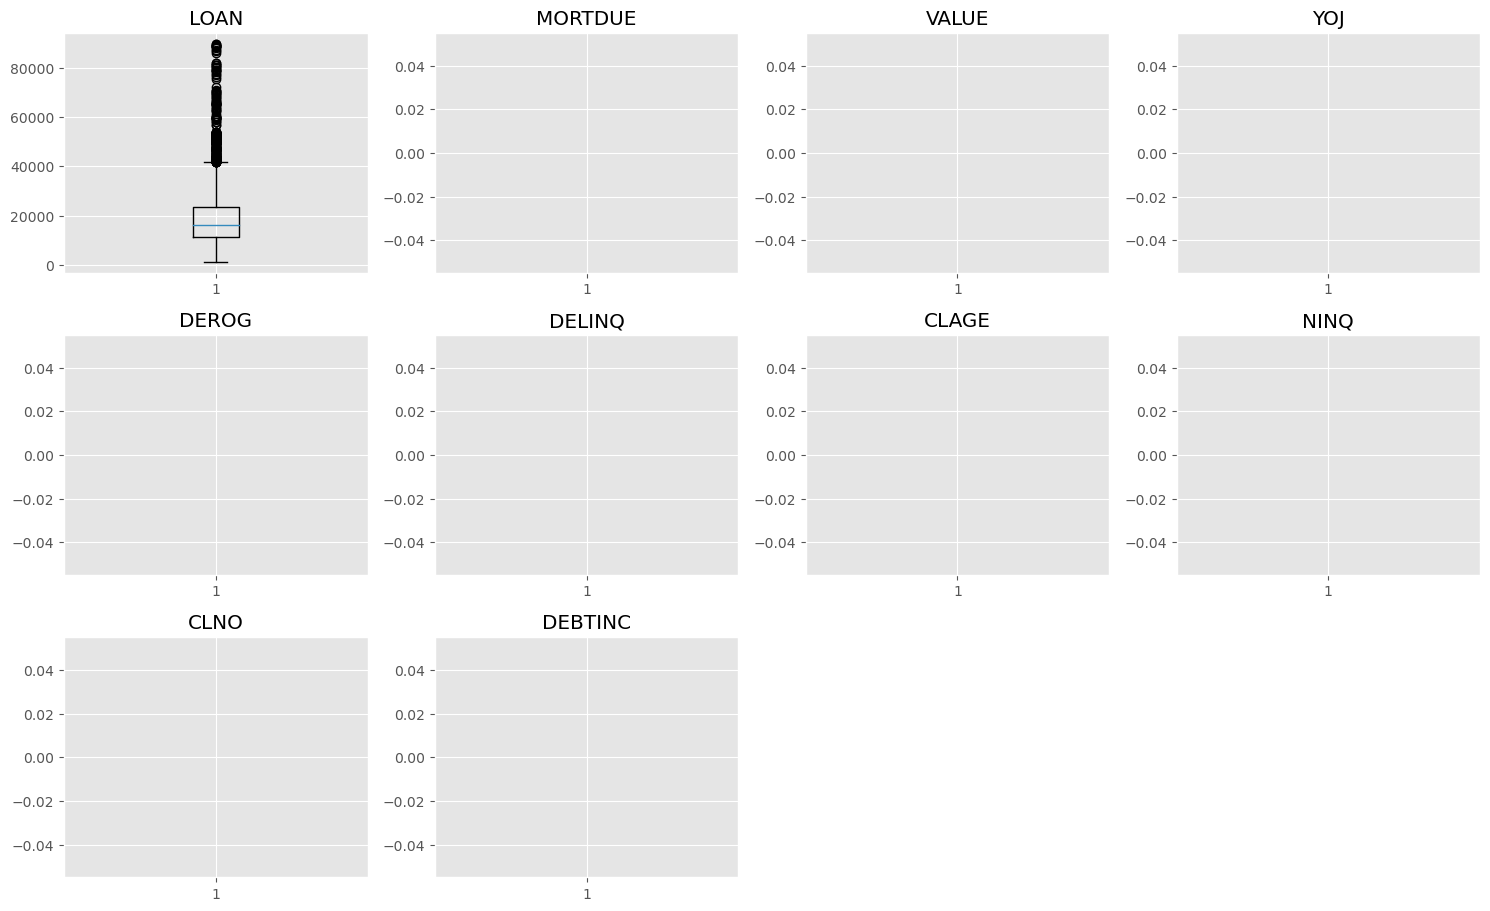

In [197]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Treating Missing Values

In [198]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame(
    {
        'Count':df.isnull().sum()[df.isnull().sum()>0],
        'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100
    })

,Count,Percentage
MORTDUE,518,8.691275
VALUE,112,1.879195
REASON,252,4.228188
JOB,279,4.681208
YOJ,515,8.640940
DEROG,708,11.879195
DELINQ,580,9.731544
CLAGE,308,5.167785
NINQ,510,8.557047
CLNO,222,3.724832


### First, the "REASON" and "JOB" columns will be treated by filling the missing values with the column's mode.

In [199]:
# Fill missing values in 'REASON' column with the mode value
df['REASON'] = df['REASON'].fillna(value=df['REASON'].mode().iloc[0])

In [200]:
# Fill missing values in 'JOB' column with the mode value
df['JOB'] = df['JOB'].fillna(value = df['JOB'].mode().iloc[0])

In [201]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
MORTDUE,518,8.691275
VALUE,112,1.879195
YOJ,515,8.640940
DEROG,708,11.879195
DELINQ,580,9.731544
CLAGE,308,5.167785
NINQ,510,8.557047
CLNO,222,3.724832
DEBTINC,1267,21.258389


In [202]:
# extracting all the information of other variable where MORTDUE is null
df.loc[df['MORTDUE'].isnull()==True]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN
24,1,2400,NaN,17180.0,HomeImp,Other,NaN,0.0,0.0,14.566667,3.0,4.0,NaN
40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
41,1,3000,NaN,33000.0,HomeImp,Other,1.0,0.0,1.0,23.300000,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,53700,NaN,84205.0,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.639940
5883,0,53800,NaN,81322.0,HomeImp,Self,9.0,0.0,0.0,171.447555,0.0,22.0,24.709060
5884,0,53900,NaN,91309.0,HomeImp,Other,NaN,0.0,0.0,349.795748,0.0,6.0,22.061330
5930,1,72300,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,5.0,23.0,NaN


In [203]:
df['MORTDUE'] = df['MORTDUE'].fillna(value = df.groupby(['JOB','REASON'])['MORTDUE'].transform('median'))

In [204]:
df['VALUE'] = df['VALUE'].fillna(value = df.groupby(['JOB','REASON'])['VALUE'].transform('median'))

In [205]:
df['YOJ'] = df['YOJ'].fillna(value = df.groupby(['JOB','REASON'])['YOJ'].transform('median'))

In [206]:
df['DEROG'] = df['DEROG'].fillna(value = df.groupby(['JOB','REASON'])['DEROG'].transform('median'))

In [207]:
df['DELINQ'] = df['DELINQ'].fillna(value = df.groupby(['JOB','REASON'])['DELINQ'].transform('median'))

In [208]:
df['CLAGE'] = df['CLAGE'].fillna(value = df.groupby(['JOB','REASON'])['CLAGE'].transform('median'))

In [209]:
df['NINQ'] = df['NINQ'].fillna(value = df.groupby(['JOB','REASON'])['NINQ'].transform('median'))

In [210]:
df['CLNO'] = df['CLNO'].fillna(value = df.groupby(['JOB','REASON'])['CLNO'].transform('median'))

In [211]:
df['DEBTINC'] = df['DEBTINC'].fillna(value = df.groupby(['JOB','REASON'])['DEBTINC'].transform('median'))

In [212]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [213]:
df = pd.get_dummies(
    df, 
    columns = df.select_dtypes(include = ['object']).columns.tolist(),
    drop_first = True,
    dtype=int
)
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.260266,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.260266,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.260266,1,0,1,0,0,0
3,1,1500,55575.0,77893.0,7.0,0.0,0.0,156.593708,1.0,18.0,34.767289,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,35.949877,1,1,0,0,0,0


In [214]:
x = df.drop('BAD', axis =1)
y = df['BAD']

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, shuffle=True, random_state=1, stratify = y)

In [216]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [217]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

### Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



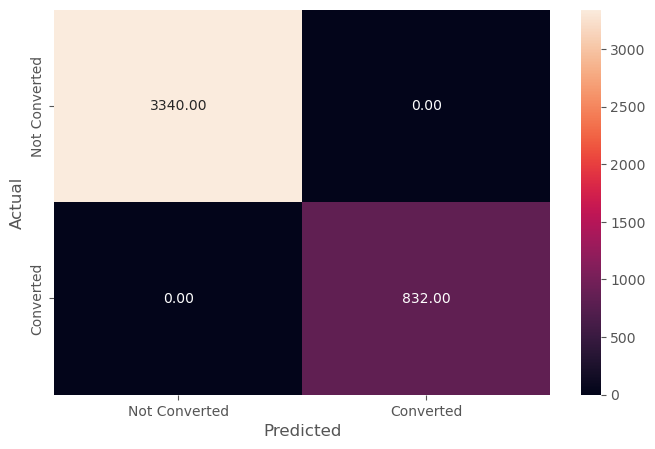

In [218]:
# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, random_state=1)

# Train the decision tree classifier using the training data
dt.fit(x_train, y_train)

# Predict the target variable for the training data
y_train_pred_dt = dt.predict(x_train)

# Calculate the metrics score
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1431
           1       0.71      0.68      0.70       357

    accuracy                           0.88      1788
   macro avg       0.82      0.81      0.81      1788
weighted avg       0.88      0.88      0.88      1788



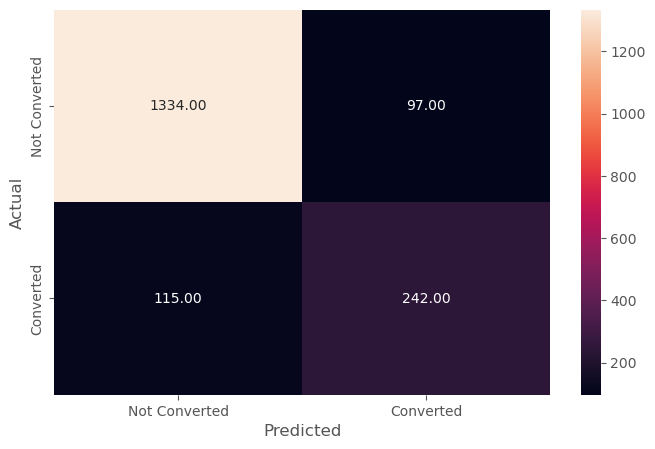

In [219]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**
- The tree seems to be overfitting the data as the recall is 0.79 on the test data but 1 on the training data. 


In [220]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.81725,0.805043,0.881432


In [221]:
features = list(x.columns)

<Axes: xlabel='Importance'>

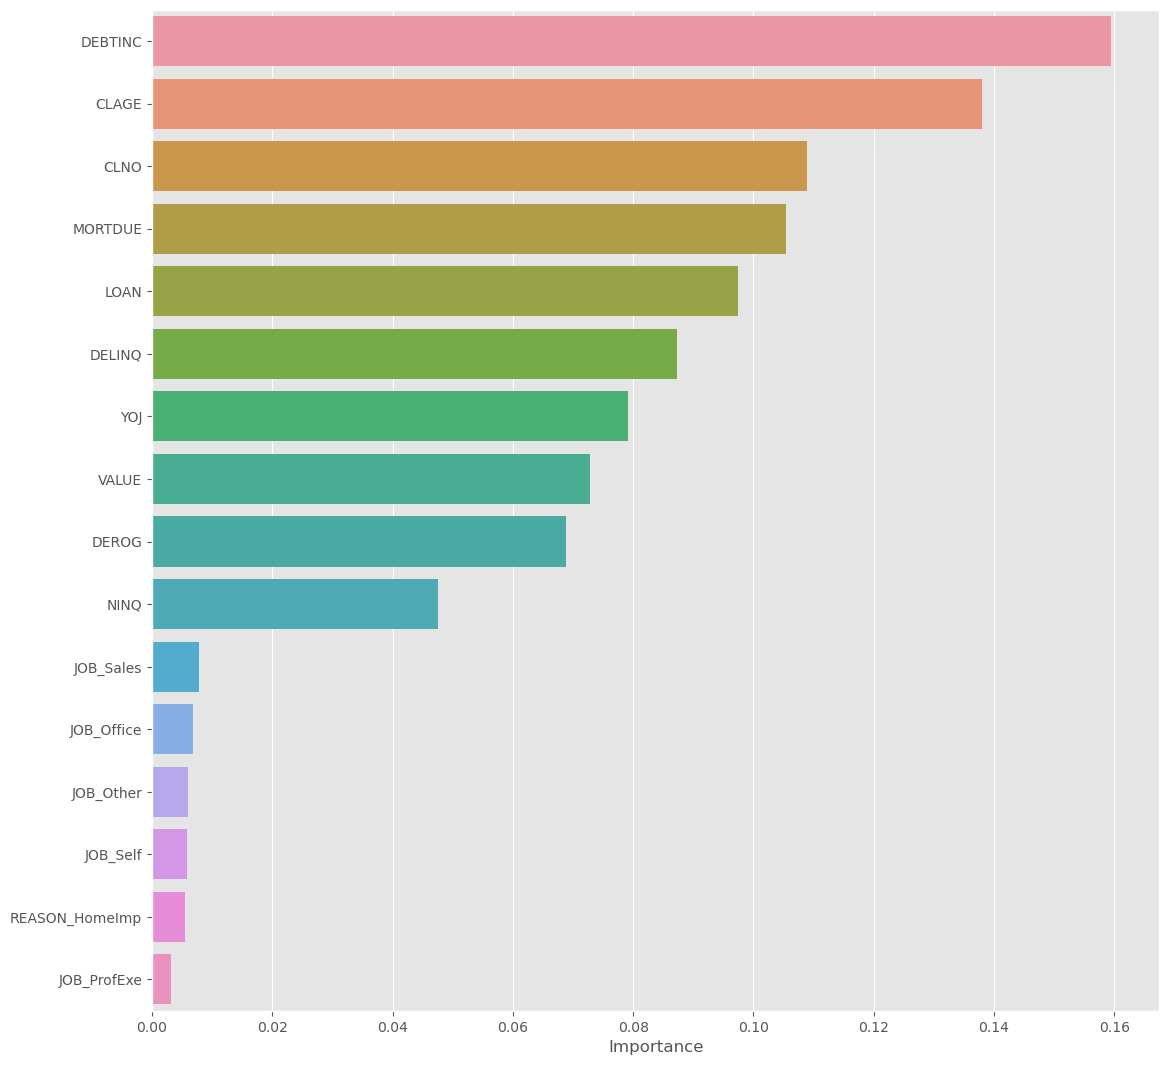

In [222]:
# Importance features 

importances = dt.feature_importances_
columns = features
importance_df = pd.DataFrame(importances, index=features, columns = ['Importance']).sort_values(by= 'Importance', ascending= False)
plt.figure(figsize= (13,13))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:** We can see from the decision tree the most important feature is the Debt-to-income ratio, followed by the age of the oldest credit line, number of existing credit lines and the amount of loand approved.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [223]:
# Create a Decision Tree Classifier with class weights
dtree_estimator = DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, random_state=1)

# Define the parameters for grid search
parameters = {
    'max_depth': np.arange(2, 7),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 20, 25]
}

# Create a scorer for grid search
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Create a GridSearchCV object
gridCV = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=10)

# Fit the GridSearchCV to the training data
gridCV = gridCV.fit(x_train, y_train)

# Update the Decision Tree Classifier with the best estimator found during grid search
dtree_estimator = gridCV.best_estimator_

# Fit the Decision Tree Classifier to the training data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, criterion='entropy',
                       max_depth=6, min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3340
           1       0.91      0.33      0.49       832

    accuracy                           0.86      4172
   macro avg       0.88      0.66      0.70      4172
weighted avg       0.87      0.86      0.83      4172



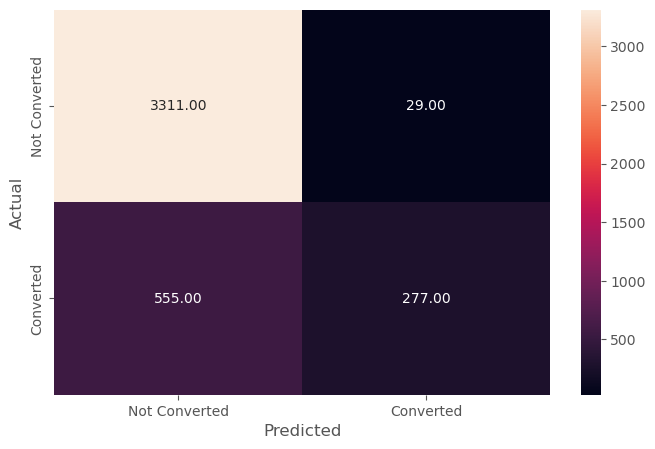

In [224]:
y_train_pred_dt_estimator = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt_estimator)

**Observations:** We can observe that this model is doing poorly on recall on the train data.

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1431
           1       0.77      0.24      0.37       357

    accuracy                           0.83      1788
   macro avg       0.80      0.61      0.64      1788
weighted avg       0.82      0.83      0.80      1788



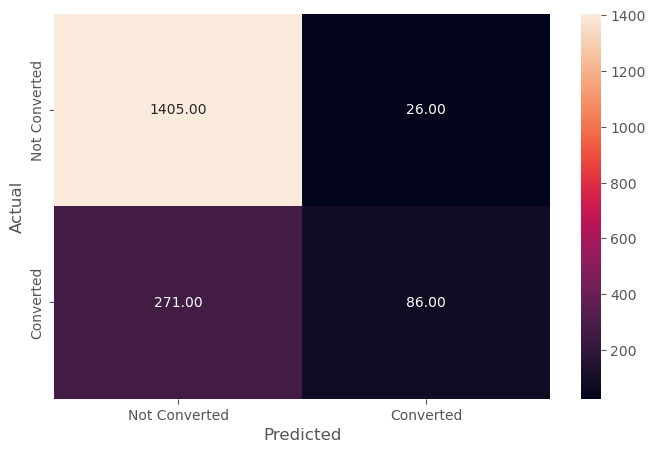

In [225]:
y_test_pred_dt_estimator = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt_estimator)

In [226]:
dtree_tuned_test = model_performance_classification(dtree_estimator, x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.803081,0.611364,0.833893


**Observation:**

- The tuned model did not improve its performance compared to the model with default values of hyperparameters.
- The model does not seem to be overfitting the data but its showing a variance  in performance on train and test datasets.

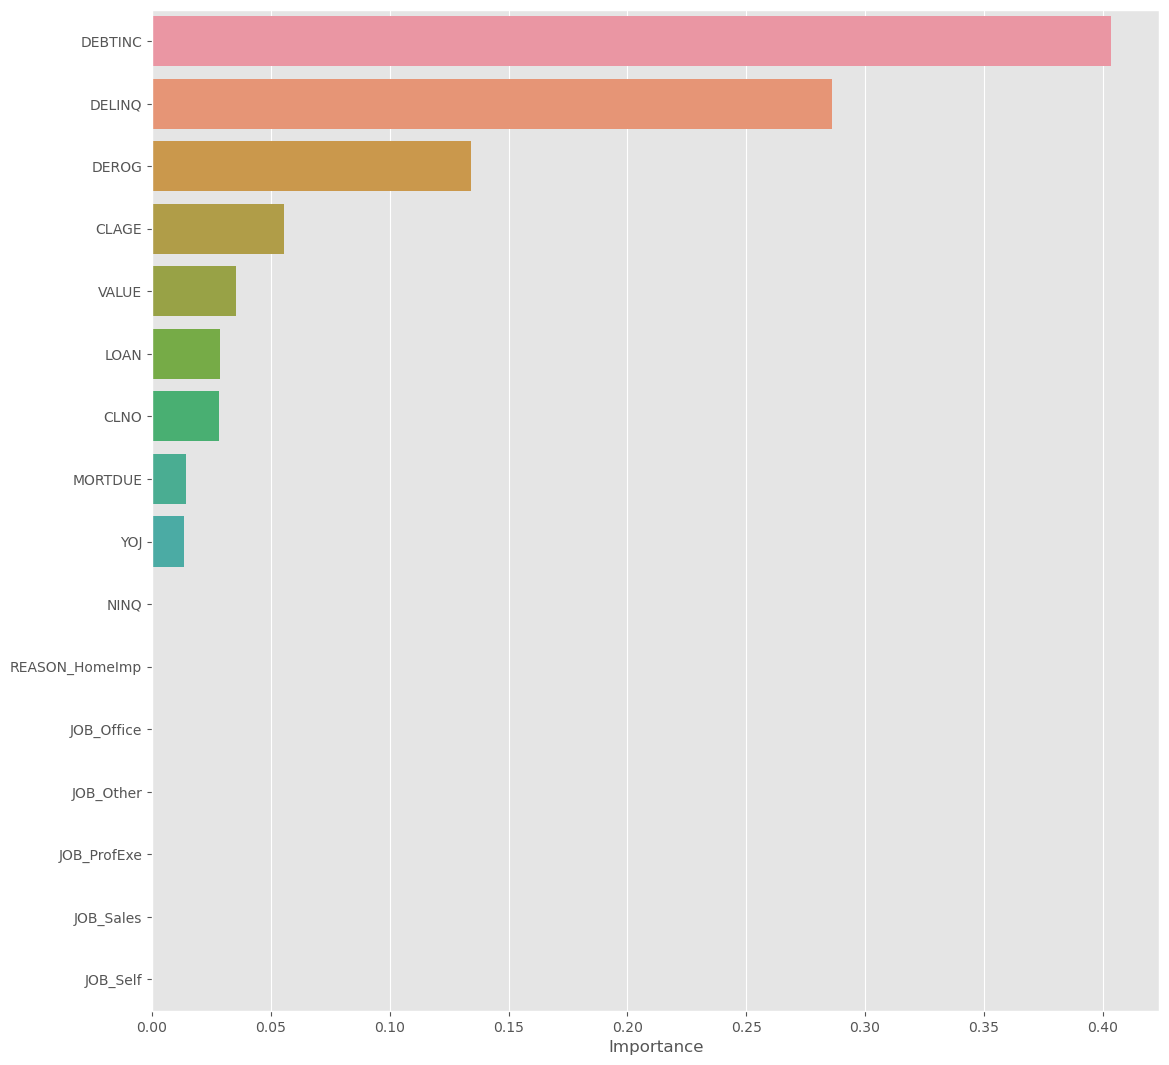

In [227]:
importances = dtree_estimator.feature_importances_

columns = features

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

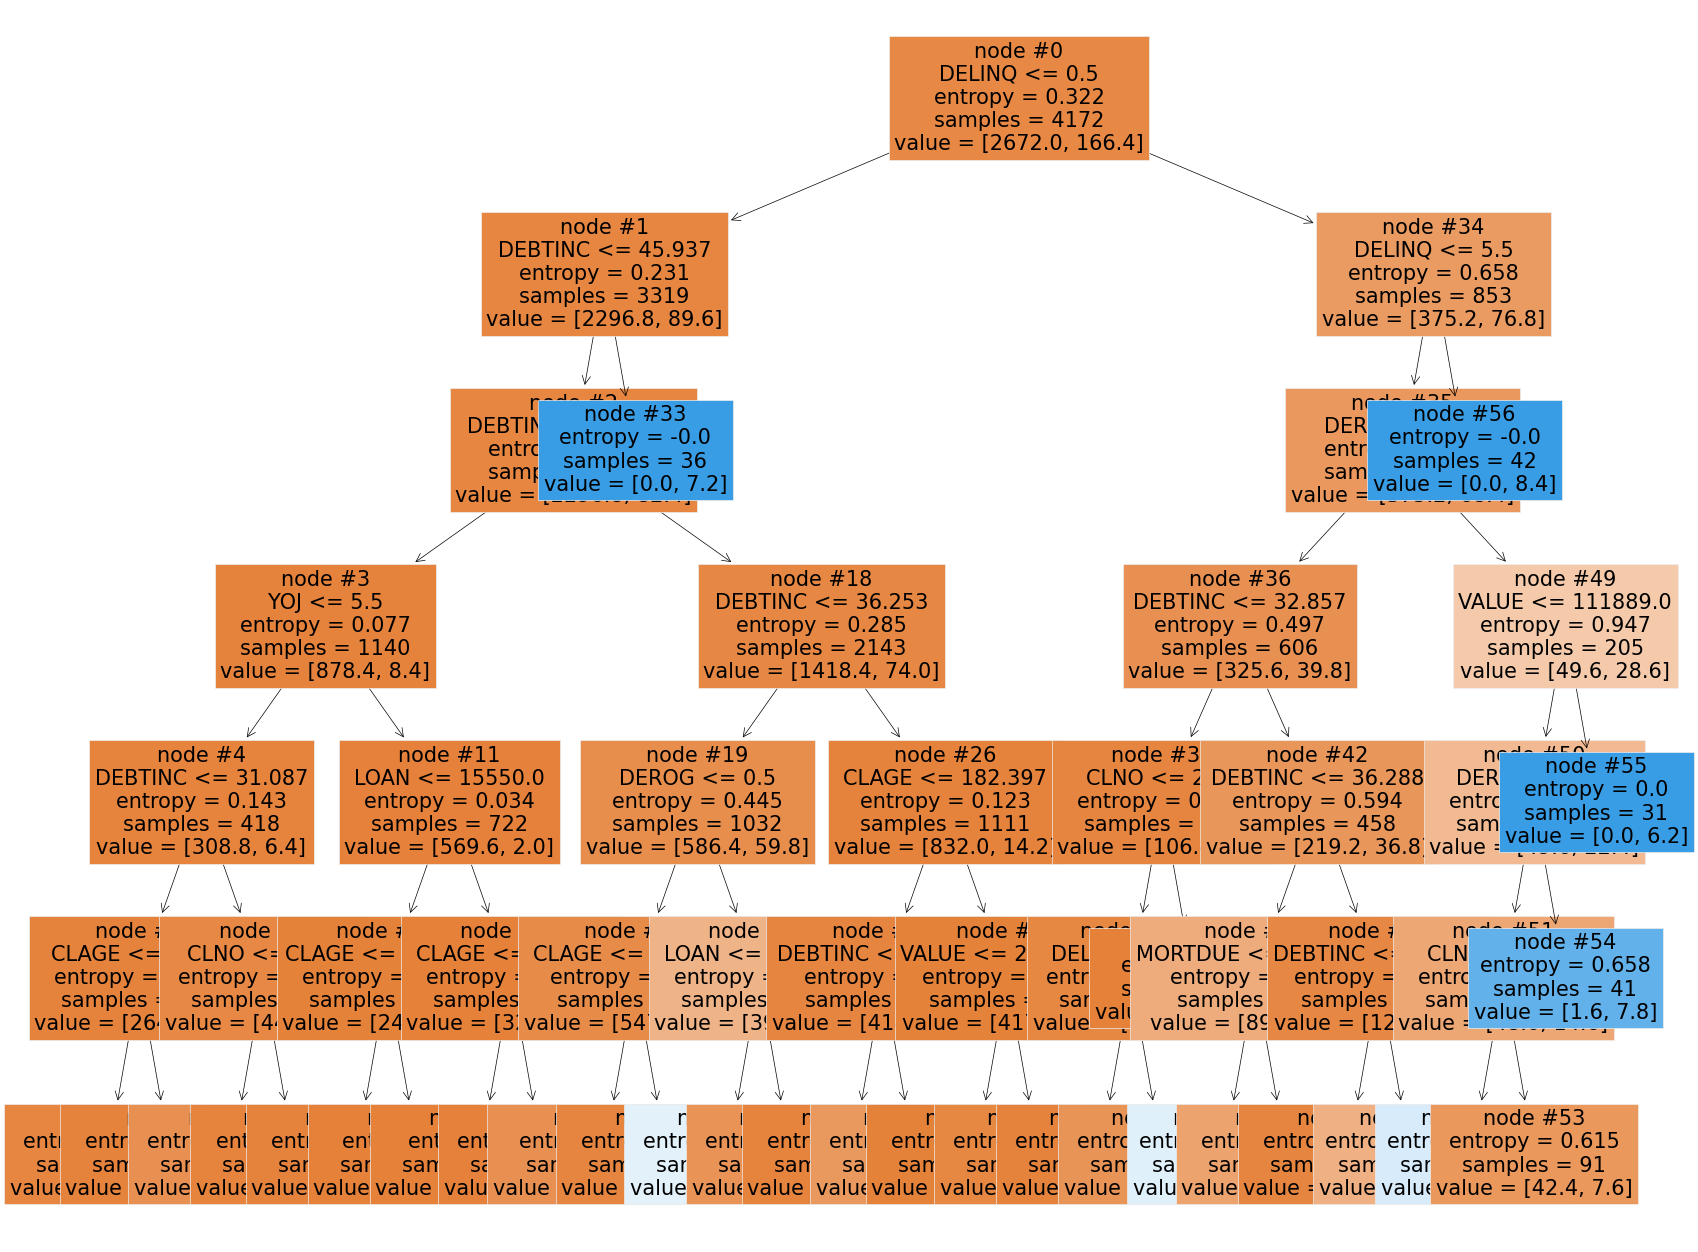

In [228]:
from sklearn import tree
plt.figure(figsize=(20,16))
tree.plot_tree(dtree_estimator, feature_names= features, 
               filled=True, fontsize=15, node_ids=True);

**Observations:** The tuned model shows that debt-to-income ratio is still the most important feature, however, now the number of delinquent credit lines is the second most important feature. 

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [229]:
# Create an instance of the RandomForestClassifier with specified class weights and random state
rf_estimator = RandomForestClassifier(
    class_weight={0: 0.8, 1: 0.2},
    random_state=1
)

# Fit the training data to the estimator
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



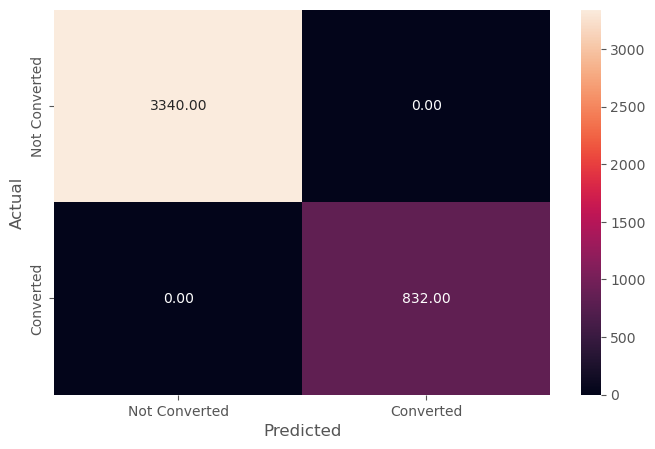

In [230]:
y_pred_train_rf = rf_estimator.predict(x_train)

# Calculate metrics score
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1431
           1       0.90      0.67      0.77       357

    accuracy                           0.92      1788
   macro avg       0.91      0.83      0.86      1788
weighted avg       0.92      0.92      0.92      1788



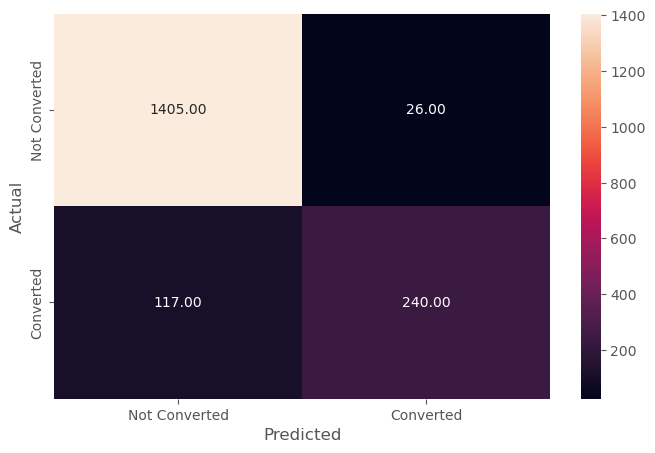

In [231]:
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~0.66 for class 1.
- The Random Forest classifier is having a better performance than the tuned decision tree.

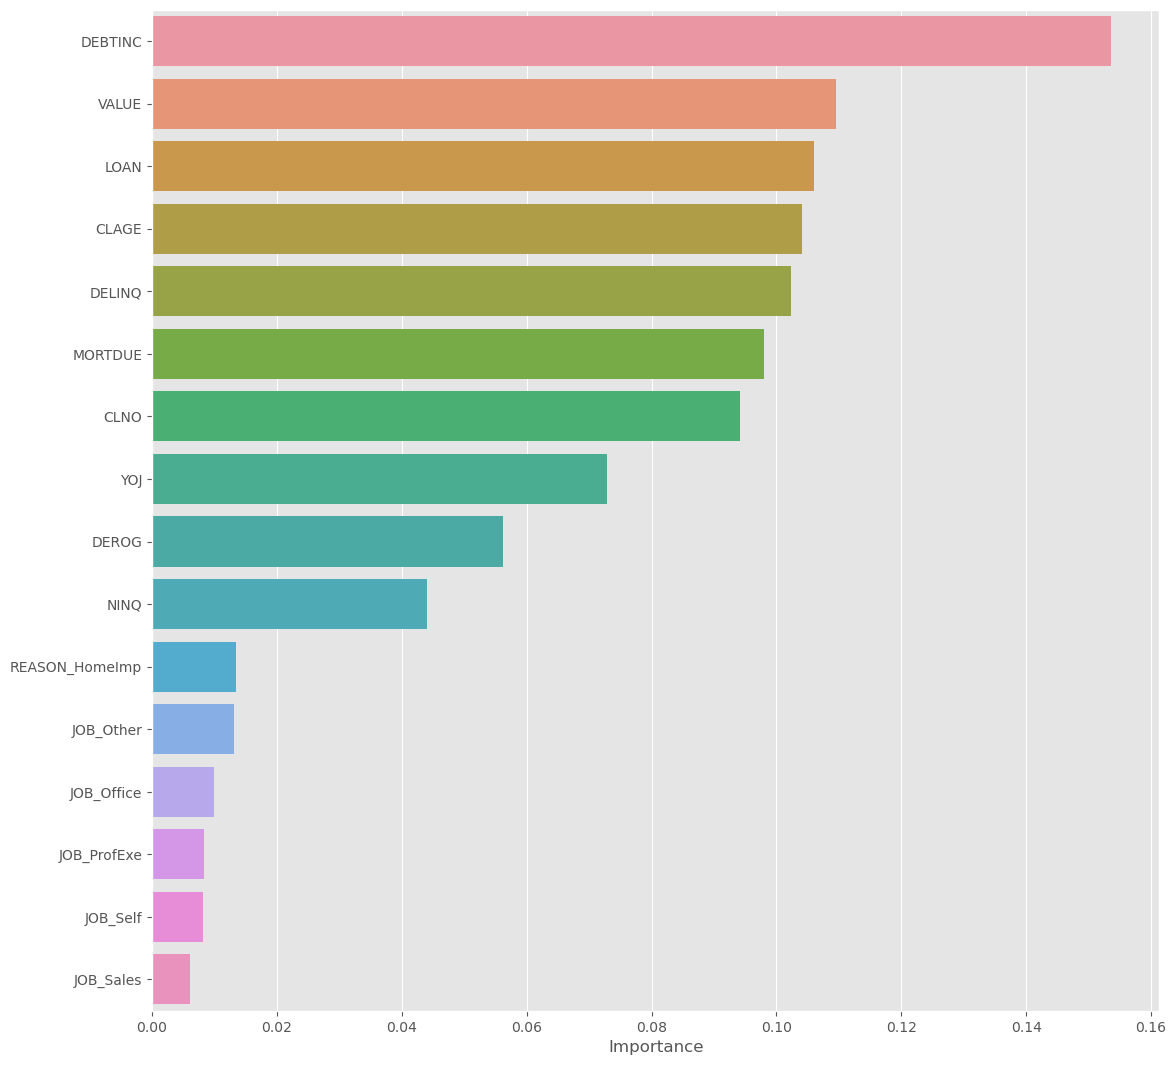

In [232]:
importances = rf_estimator.feature_importances_

columns = features

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

**Observations:** The Random Classiffier confirms the importance on the Debt-to-income ratio, now followed by the value of the property and the age of the credit line. 

In [233]:
rf_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_test

,Precision,Recall,Accuracy
0,0.912692,0.82705,0.920022


**Observations:**

- The Random Forest Classiffier is performing way better than the other two models that we saw above.

### **Random Forest Classifier Hyperparameter Tuning**

In [234]:
# Create a tuned random forest classifier
rf_estimator_tuned = RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, random_state=1)

# Define the parameter grid for grid search
parameters_rf = {
    'n_estimators': [100, 250, 500],
    'min_samples_leaf': np.arange(1, 4, 1),
    'max_features': [0.7, 0.9, 'auto']
}

# Create a scorer using recall_score with positive label 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Create a GridSearchCV object
grid_obj = GridSearchCV(rf_estimator_tuned, parameters_rf, scoring=scorer, cv=5)

# Fit the training data to GridSearchCV to obtain the best_estimator
grid_obj = grid_obj.fit(x_train, y_train)

# Update rf_estimator_tuned with the best estimator found by GridSearchCV
rf_estimator_tuned = grid_obj.best_estimator_

In [235]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, max_features=0.9,
                       n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



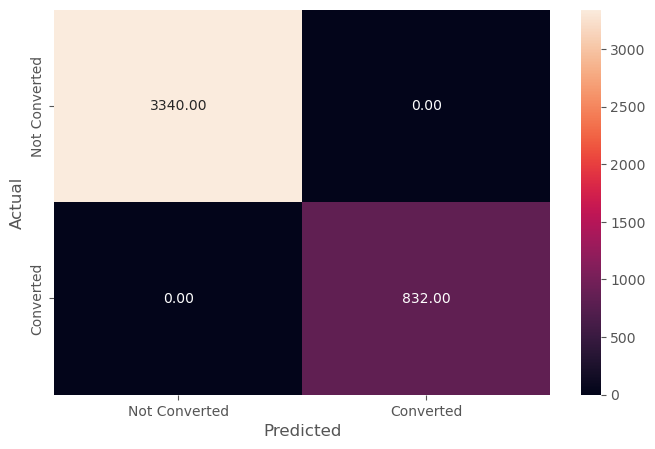

In [236]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.87      0.68      0.76       357

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



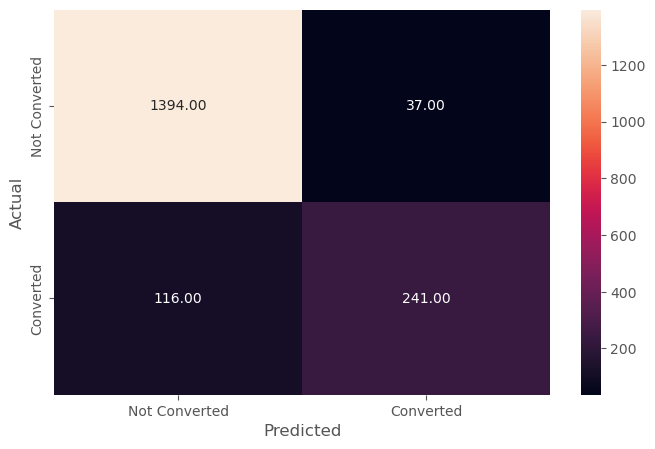

In [237]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [238]:
rf_tuned_test = model_performance_classification(rf_estimator_tuned, x_test,y_test)
rf_tuned_test

,Precision,Recall,Accuracy
0,0.895043,0.824607,0.91443


**Observaciones:** The tuned Random Forest Classifier is performing similarly than the default Random Forest

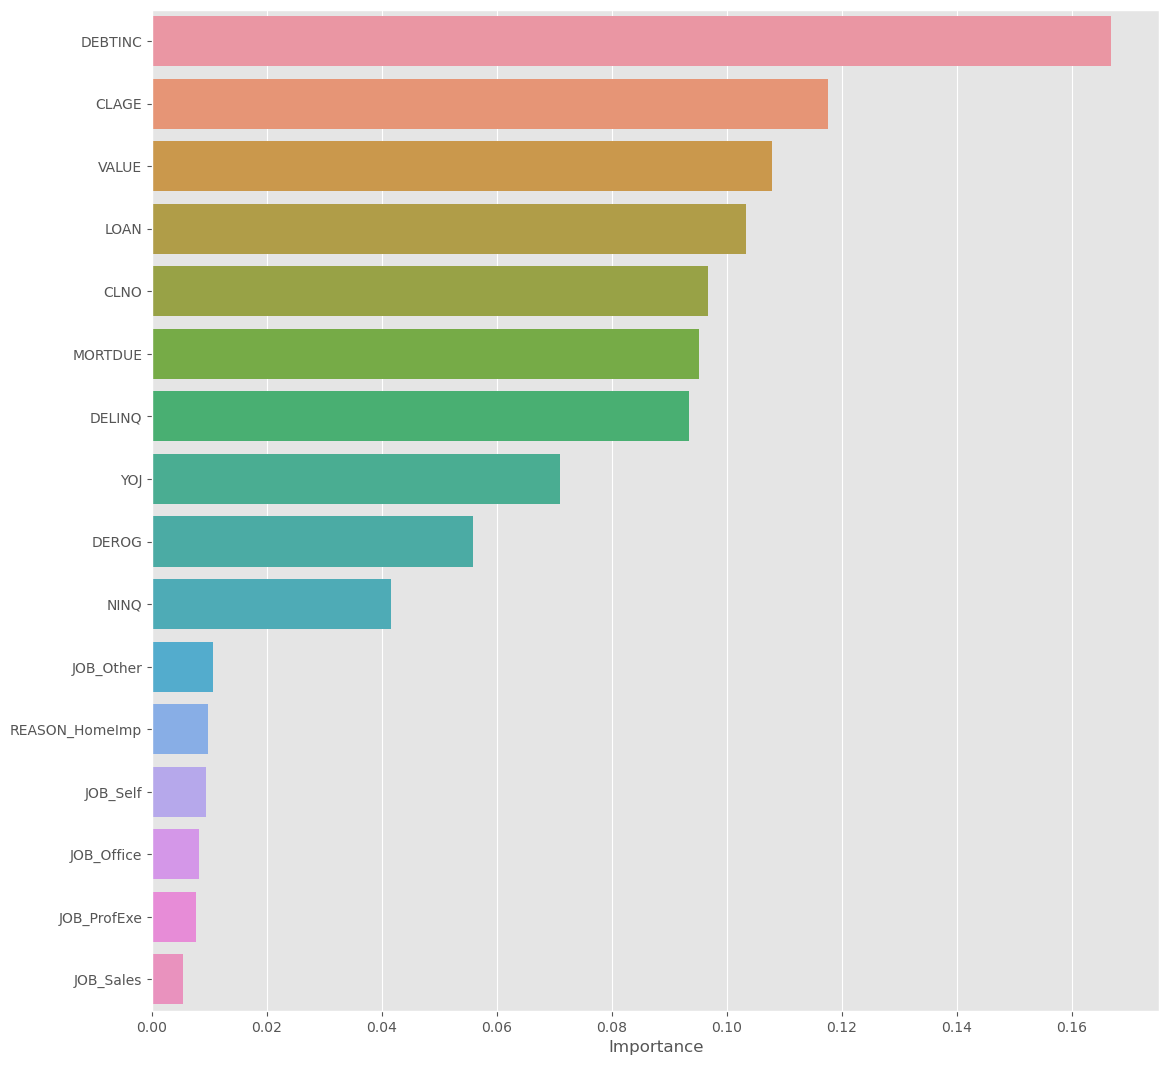

In [239]:
importances = rf_estimator_tuned.feature_importances_

columns = features

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

**Observaciones:** The tuned Random Forest Classiffier shows the same columns with similar importance scores. 

In [240]:
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,rf_test.T,
    rf_tuned_test.T
    ],

    axis = 1,
)
models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
]

# Test Performance Comparison:

In [241]:
models_test_comp_df 

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
Precision,0.817250,0.803081,0.912692,0.895043
Recall,0.805043,0.611364,0.827050,0.824607
Accuracy,0.881432,0.833893,0.920022,0.914430


**Observations:** 
- The best performing model is the Random Forest Classifier an its tuned version. 

# Actionable Insights and Recommendations

- The analysis demonstrates that the debt-to-income ratio is a really important feature when it comes to a person that is applying to a loan, it feels intuitive to think that a person with a greater debt payment than their monthly income should not be considered as a possible customer, these people seem to be the most likely to default on their loan payments. 
- Their oldest line seems to be also a good indicator towards how likely is someone to default on their loans. 
- Another important feature is the number of credit lines, it is more likely that people with a high amount of credit lines defaults at least 1. 
- The Random Forest classifier, both untuned and tuned, generally outperforms the Decision Tree classifier in terms of precision, recall, and accuracy.
- The Random Forest is the best solution to adopt for the following reasons: 
    - High Precision and Recall: The Random Forest classifier has high precision (0.912) and recall (0.827), indicating a good balance between correctly identifying positive instances and minimizing false negatives.
    - High Accuracy: The accuracy of 0.908 is relatively high, suggesting a good overall performance.
- We should consider that Random Forest is an ensemble method, and it might be computationally more expensive compared to a single Decision Tree. 

### Recommendations for Implementation

**Key Recommendations to Implement the Solution:**
1. **Infrastructure Setup:**
   - Invest in the necessary IT infrastructure and software tools for deploying the machine learning model.
   - Ensure data security and privacy measures are in place, especially when handling sensitive customer information.

2. **Team and Skill Development:**
   - Assemble a team of data scientists, IT professionals, and subject experts.
   - Invest in training for current staff to understand and work with the new system.

3. **Data Management:**
   - Establish a robust data collection and management system to ensure the model has access to high-quality, relevant data.
   - Regularly update the dataset to reflect current market trends and customer profiles.

4. **Model Deployment and Integration:**
   - Implement the model in stages to monitor its performance and impact.
   - Integrate the model seamlessly with existing loan approval workflows.

5. **Continuous Monitoring and Evaluation:**
   - Set up a system for ongoing monitoring and evaluation of the model's performance and fairness.
   - Regularly review and update the model to maintain its accuracy and compliance with regulations.

**Key Actionables for Stakeholders:**
- **Executive Leadership:** Approve budget allocations, oversee implementation progress, and ensure alignment with business objectives.
- **IT Department:** Handle the technical aspects of implementation, including infrastructure setup and data security.
- **Compliance Team:** Ensure the model adheres to legal standards and ethical guidelines.
- **Loan Officers:** Collaborate with the data team for insights and feedback on the model's decisions.

**Expected Benefits and Costs:**
- **Benefits:**
  - Reduced risk of NPAs and improved loan approval accuracy.
  - Increased efficiency and reduced operational costs in the long term.
  - Enhanced customer satisfaction and trust.
  - Compliance with legal standards, reducing the risk of penalties.
- **Costs:**
  - Initial investment in IT infrastructure and software.
  - Training and development costs for staff.
  - Ongoing expenses for model maintenance and data management.

**Rational Assumptions for Costs/Benefits:**
- Assume a 20% reduction in loan approval processing time.
- Predict a 10% decrease in NPAs due to more accurate risk assessment.
- Initial investment could be approximately 5-10% of the annual IT budget, with ongoing costs at 2-3% annually.

**Key Risks and Challenges:**
- **Data Privacy and Security:** Ensuring the confidentiality and integrity of customer data.
- **Model Bias and Fairness:** Addressing potential biases in the model to prevent unfair loan decisions.
- **Regulatory Compliance:** Keeping up with changing regulations and standards.
- **Technology Integration:** Integrating the new system with existing processes without disrupting operations.

**Further Analysis and Associated Problems:**
- **Market Dynamics:** Continuous analysis of market trends and their impact on loan defaults.
- **Customer Feedback:** Gathering feedback on the loan approval process for improvements.
- **Advanced Analytics:** Exploring advanced machine learning techniques for better predictions.
- **Regulatory Changes:** Staying updated with any changes in lending regulations and modifying the model accordingly.
